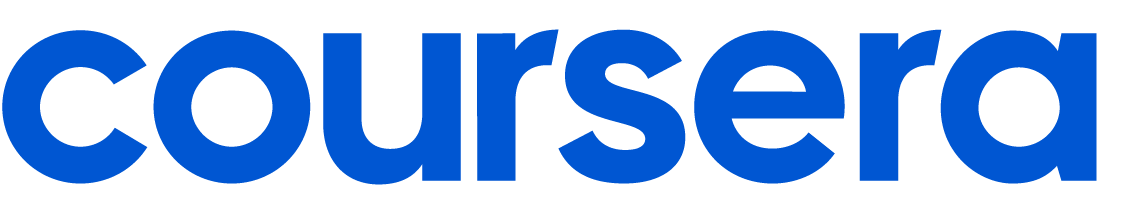

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [317]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [320]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, \
ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve, classification_report

from sklearn.inspection import permutation_importance

import statsmodels.api as sm

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler 
 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.dummy import DummyClassifier

from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold

from xgboost import plot_importance

from sklearn.feature_selection import RFE, SelectFromModel, VarianceThreshold
from sklearn.utils.class_weight import compute_sample_weight

from sklearn.decomposition import PCA

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import itertools

In [321]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
pd.set_option('future.no_silent_downcasting', True)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [323]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [324]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## Explore, Clean, Validate, and Visualize the Data

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [326]:
print(train_df.info())
print()
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [327]:
train_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [328]:
#Check the class balance of the target variable in the train set
print("The class balance of the target variable among train set")
print(train_df['Default'].value_counts(normalize=True))


The class balance of the target variable among train set
Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64


The target variable 'Default' is highly imbalanced with almost 12% of positive class.

**Checking missing values**

In [331]:
print("Number of missing values in 'train_df':")
print(train_df.isna().sum())
print()
print("Number of missing values in 'test_df':")
print(test_df.isna().sum())

Number of missing values in 'train_df':
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

Number of missing values in 'test_df':
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64


No missing values in both sets.

# **Cleaning data** #

In [334]:
# Check the possible values of 'PaymentMethod' variable
print(train_df['Education'].value_counts())
print(test_df['Education'].value_counts())

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64
Education
Bachelor's     27768
High School    27409
Master's       27293
PhD            26965
Name: count, dtype: int64


'Education' variable has values which include space characters ' '. In order to avoid future problems, I would be best to replace the space characters with underscores before I continue with modeling.
Also, this categorical variable has two different values which has "'s", so I'll drop the "'" sign.

In [336]:
replacements = {"Bachelor's": "Bachelors", "Master's":"Masters",
                "High School": "HighSchool"}

train_df.replace(replacements, inplace=True)
test_df.replace(replacements, inplace=True)

print(train_df['Education'].value_counts())
print(test_df['Education'].value_counts())

Education
Bachelors     64366
HighSchool    63903
Masters       63541
PhD           63537
Name: count, dtype: int64
Education
Bachelors     27768
HighSchool    27409
Masters       27293
PhD           26965
Name: count, dtype: int64


**Outliers in continuos variables**

In [338]:
train_df['Age'].describe()

count    255347.000000
mean         43.498306
std          14.990258
min          18.000000
25%          31.000000
50%          43.000000
75%          56.000000
max          69.000000
Name: Age, dtype: float64

25.0


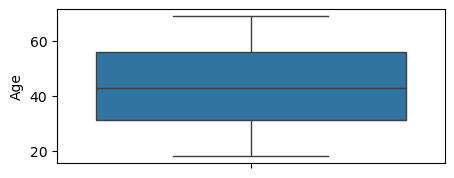

In [339]:
print(train_df['Age'].quantile(0.75) - train_df['Age'].quantile(0.25))
plt.figure(figsize=(5,2))
sns.boxplot(train_df['Age']);

In [340]:
train_df['Income'].describe()

count    255347.000000
mean      82499.304597
std       38963.013729
min       15000.000000
25%       48825.500000
50%       82466.000000
75%      116219.000000
max      149999.000000
Name: Income, dtype: float64

67393.5


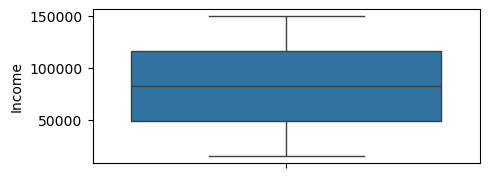

In [341]:
print(train_df['Income'].quantile(0.75) - train_df['Income'].quantile(0.25))
plt.figure(figsize=(5,2))
sns.boxplot(train_df['Income']);

In [342]:
train_df['LoanAmount'].describe()

count    255347.000000
mean     127578.865512
std       70840.706142
min        5000.000000
25%       66156.000000
50%      127556.000000
75%      188985.000000
max      249999.000000
Name: LoanAmount, dtype: float64

122829.0


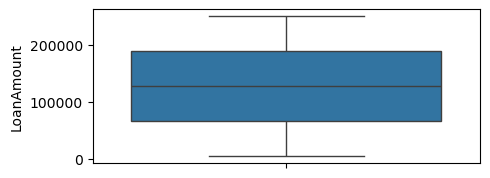

In [343]:
print(train_df['LoanAmount'].quantile(0.75) - train_df['LoanAmount'].quantile(0.25))
plt.figure(figsize=(5,2))
sns.boxplot(train_df['LoanAmount']);

In [344]:
train_df['CreditScore'].describe()

count    255347.000000
mean        574.264346
std         158.903867
min         300.000000
25%         437.000000
50%         574.000000
75%         712.000000
max         849.000000
Name: CreditScore, dtype: float64

275.0


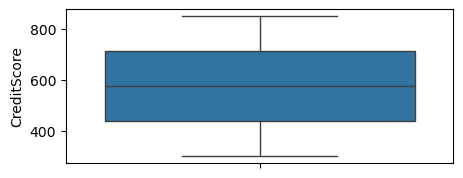

In [345]:
print(train_df['CreditScore'].quantile(0.75) - train_df['CreditScore'].quantile(0.25))
plt.figure(figsize=(5,2))
sns.boxplot(train_df['CreditScore']);

In [346]:
train_df['MonthsEmployed'].describe()

count    255347.000000
mean         59.541976
std          34.643376
min           0.000000
25%          30.000000
50%          60.000000
75%          90.000000
max         119.000000
Name: MonthsEmployed, dtype: float64

60.0


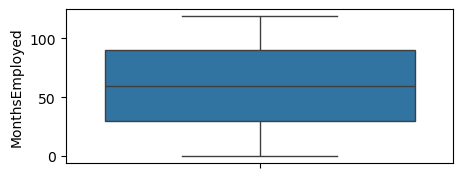

In [347]:
print(train_df['MonthsEmployed'].quantile(0.75) - train_df['MonthsEmployed'].quantile(0.25))
plt.figure(figsize=(5,2))
sns.boxplot(train_df['MonthsEmployed']);

In [348]:
train_df['NumCreditLines'].describe()

count    255347.000000
mean          2.501036
std           1.117018
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: NumCreditLines, dtype: float64

1.0


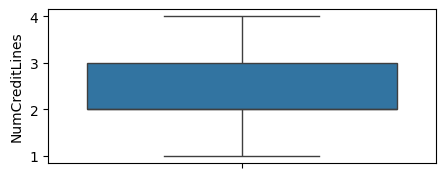

In [349]:
print(train_df['NumCreditLines'].quantile(0.75) - train_df['NumCreditLines'].quantile(0.25))
plt.figure(figsize=(5,2))
sns.boxplot(train_df['NumCreditLines']);

In [350]:
train_df['InterestRate'].describe()

count    255347.000000
mean         13.492773
std           6.636443
min           2.000000
25%           7.770000
50%          13.460000
75%          19.250000
max          25.000000
Name: InterestRate, dtype: float64

11.48


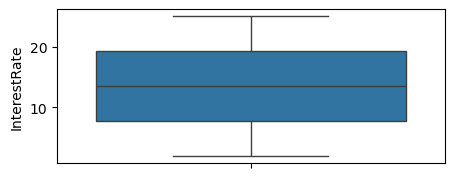

In [351]:
print(train_df['InterestRate'].quantile(0.75) - train_df['InterestRate'].quantile(0.25))
plt.figure(figsize=(5,2))
sns.boxplot(train_df['InterestRate']);

In [352]:
train_df['LoanTerm'].describe()

count    255347.000000
mean         36.025894
std          16.969330
min          12.000000
25%          24.000000
50%          36.000000
75%          48.000000
max          60.000000
Name: LoanTerm, dtype: float64

24.0


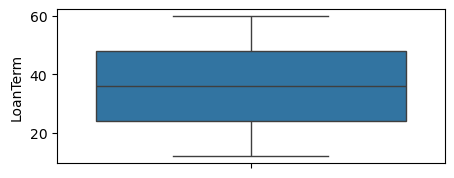

In [353]:
print(train_df['LoanTerm'].quantile(0.75) - train_df['LoanTerm'].quantile(0.25))
plt.figure(figsize=(5,2))
sns.boxplot(train_df['LoanTerm']);

In [354]:
train_df['DTIRatio'].describe()

count    255347.000000
mean          0.500212
std           0.230917
min           0.100000
25%           0.300000
50%           0.500000
75%           0.700000
max           0.900000
Name: DTIRatio, dtype: float64

0.39999999999999997


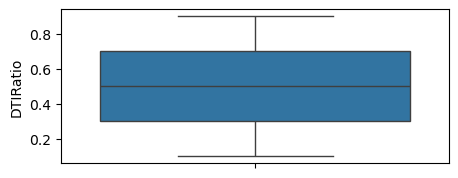

In [355]:
print(train_df['DTIRatio'].quantile(0.75) - train_df['DTIRatio'].quantile(0.25))
plt.figure(figsize=(5,2))
sns.boxplot(train_df['DTIRatio']);

# **Feature engineering** #
Let's combine some features to try to get more predictive power.

**ChurnLabel**

In [358]:
# Create new variable 'DefaultLabel' from the 'Default' target variable with encoded values 0 - Not Loan Default, and 1 - Loan Default
train_df['DefaultLabel'] = train_df['Default'].map({0: 'Not Loan Default', 1: 'Loan Default'})

In [359]:
numerical_features = ['Age','InterestRate','Income','MonthsEmployed','LoanAmount',
                     'CreditScore','NumCreditLines','DTIRatio','LoanTerm']



In [360]:
# Check the correlation of the basic numerical features with the loan default
df_list = []
corr_threshold = 0.1

for feature in numerical_features:
    correlation = np.corrcoef(train_df[f"{feature}"], train_df['Default'])[0, 1]
    if abs(correlation) >= corr_threshold:
        # Save the result of the correlation in a DataFrame for future comparison
        corr_df = pd.DataFrame({'Feature': f"{feature}", 'Correlation': correlation}, index=[0])
        df_list.append(corr_df)

# Create combined features and check their correlation with the loan default
for feature1, feature2 in itertools.combinations(numerical_features, 2):

    # Check how this new feature is correlated with loan default
    correlation = np.corrcoef(train_df[feature1]*train_df[feature2], train_df['Default'])[0, 1]
    if abs(correlation) >= corr_threshold:
        # Create interaction term
        train_df[f"{feature1}{feature2}"] = train_df[feature1] * train_df[feature2]
        test_df[f"{feature1}{feature2}"] = test_df[feature1] * test_df[feature2]

        # Save the result of the correlation in a DataFrame for future comparison
        corr_df = pd.DataFrame({'Feature': f"{feature1}{feature2}", 'Correlation': correlation}, index=[0])
        df_list.append(corr_df)

    # Create ratio-based features, handling division by zero
    
    # Check how this new feature is correlated with loan default
    correlation = np.corrcoef(np.where(train_df[feature2]==0, 0, train_df[feature1]/train_df[feature2]), train_df['Default'])[0, 1]
    
    if abs(correlation) >= corr_threshold:
        train_df[f"{feature1}_Per_{feature2}"] = np.where(train_df[feature2] == 0, 0, train_df[feature1] / train_df[feature2])
        test_df[f"{feature1}_Per_{feature2}"] = np.where(test_df[feature2] == 0, 0, test_df[feature1] / test_df[feature2])

        # Save the result of the correlation in a DataFrame for future comparison
        corr_df = pd.DataFrame({'Feature': f"{feature1}_Per_{feature2}", 'Correlation': correlation}, index=[0])
    
        df_list.append(corr_df)

    # Check how this new feature is correlated with loan default
    correlation = np.corrcoef(np.where(train_df[feature1]==0, 0, train_df[feature2]/train_df[feature1]), train_df['Default'])[0, 1]
                              
    if abs(correlation) >= corr_threshold:
        train_df[f"{feature2}_Per_{feature1}"] = np.where(train_df[feature1] == 0, 0, train_df[feature2] / train_df[feature1])
        test_df[f"{feature2}_Per_{feature1}"] = np.where(test_df[feature1] == 0, 0, test_df[feature2] / test_df[feature1])
        
        # Save the result of the correlation in a DataFrame for future comparison
        corr_df = pd.DataFrame({'Feature': f"{feature2}_Per_{feature1}", 'Correlation': correlation}, index=[0])
    
        df_list.append(corr_df)

final_corr_df = pd.concat(df_list, ignore_index=True)
final_corr_df_sorted = final_corr_df.reindex(final_corr_df['Correlation'].abs().sort_values(ascending=False).index)

final_corr_df_sorted.to_csv("correlation_loan_default.csv", index=False)

**Visual representation of the mostly correlated features with loan default**

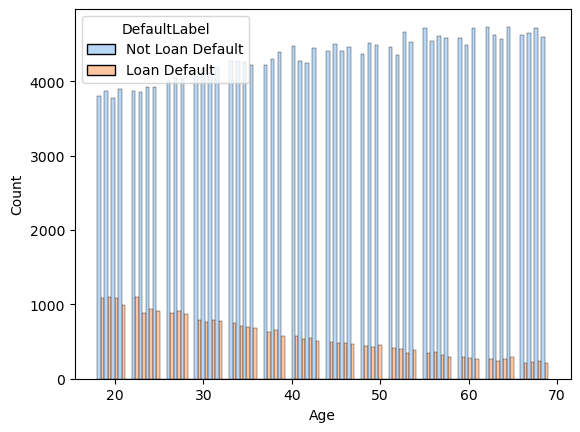

In [362]:
#Plot histplot to examine the age of the users with loan default and not.
sns.histplot(data=train_df, x='Age', hue='DefaultLabel', hue_order=['Not Loan Default', 'Loan Default'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

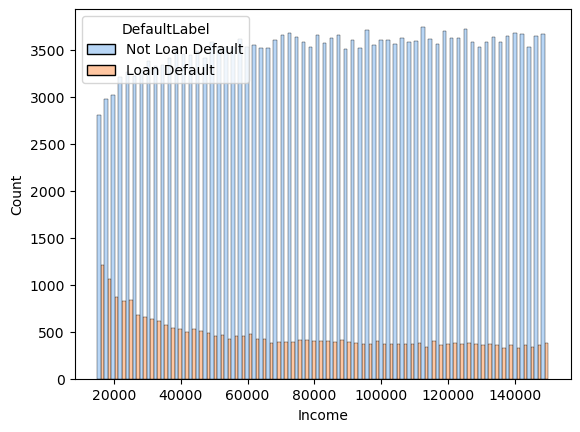

In [363]:
#Plot histplot to examine the income of the users with loan default and not.
sns.histplot(data=train_df, x='Income', hue='DefaultLabel', hue_order=['Not Loan Default', 'Loan Default'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

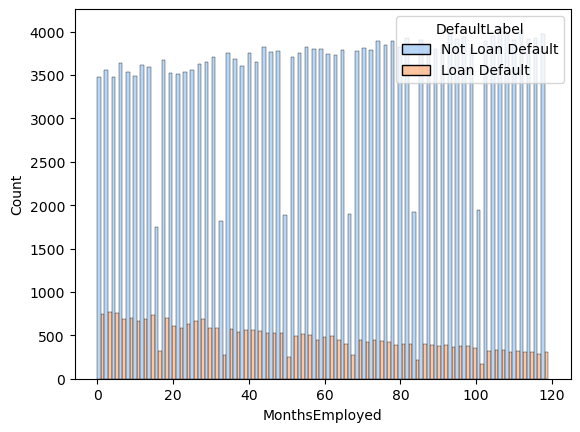

In [364]:
#Plot histplot to examine the months employed of the users with loan default and not.
sns.histplot(data=train_df, x='MonthsEmployed', hue='DefaultLabel', hue_order=['Not Loan Default', 'Loan Default'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

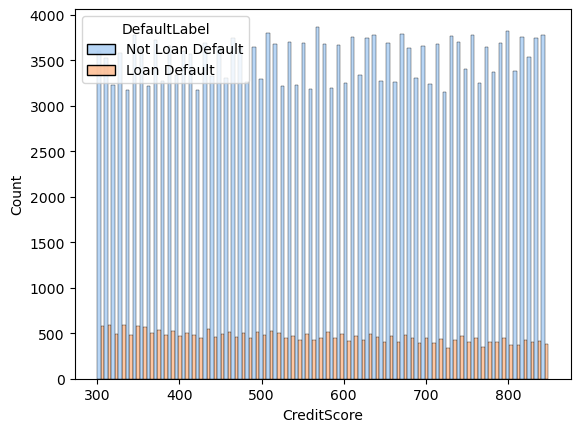

In [365]:
#Plot histplot to examine the credit score of the users with loan default and not.
sns.histplot(data=train_df, x='CreditScore', hue='DefaultLabel', hue_order=['Not Loan Default', 'Loan Default'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

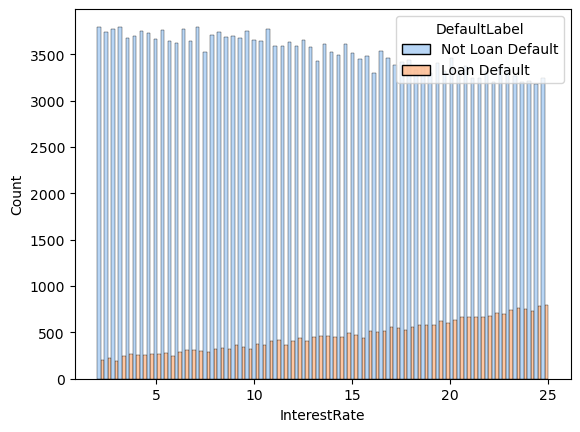

In [366]:
#Plot histplot to examine the interest rate of the users with loan default and not.
sns.histplot(data=train_df, x='InterestRate', hue='DefaultLabel', hue_order=['Not Loan Default', 'Loan Default'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

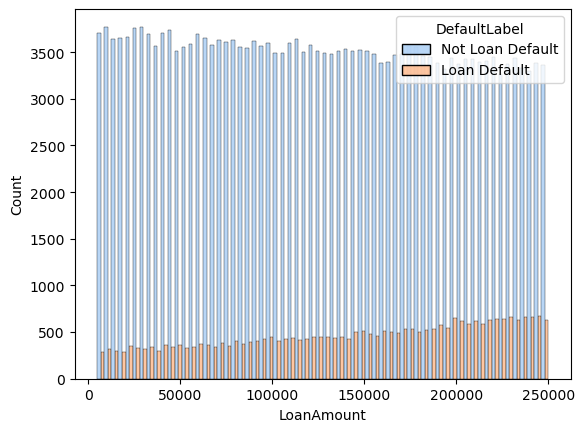

In [367]:
#Plot histplot to examine the loan amount of the users with loan default and not.
sns.histplot(data=train_df, x='LoanAmount', hue='DefaultLabel', hue_order=['Not Loan Default', 'Loan Default'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

# Categorical features #

**Education**

First, let's check the loan default among users with different levels of education.

In [371]:
train_df.groupby('Education')['Default'].value_counts(normalize=True)

Education   Default
Bachelors   0          0.878989
            1          0.121011
HighSchool  0          0.871211
            1          0.128789
Masters     0          0.891283
            1          0.108717
PhD         0          0.894140
            1          0.105860
Name: proportion, dtype: float64

The loan default among users with High School and Bachelors levels of education is slightly higher that among users with Masters and PhD levels of education.

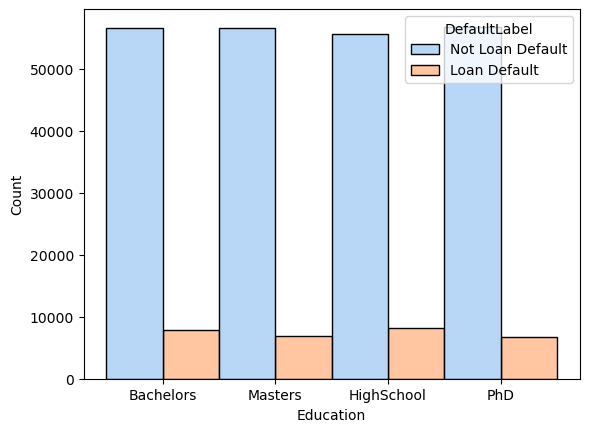

In [373]:
#Plot histplot to examine the level of education of users with loan default and not.
sns.histplot(data=train_df, x='Education', hue='DefaultLabel', hue_order=['Not Loan Default', 'Loan Default'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**LoanDefaultRiskEducation** (dropped)

Because the loan default among users with High School and Bachelors levels of education is slightly higher that among users with Masters and PhD levels of education, I'll create new feature 'LoanDefaultRiskEducation' with binary encoding the original 'Education' feature with only two values: 0 - lower risk of loan default, and 1 - higher risk of loan default.

In [376]:
# Create a new binary feature 'LoanDefaultRiskEducation' based on conditions
#train_df['LoanDefaultRiskEducation'] = train_df['Education'].apply(lambda x: 1 if x in ['HighSchool', 'Bachelors'] else 0)
#test_df['LoanDefaultRiskEducation'] = test_df['Education'].apply(lambda x: 1 if x in ['HighSchool', 'Bachelors'] else 0)

In [377]:
# Check the loan default of the new feature 'LoanDefaultRiskEducation'
#print(train_df.groupby('LoanDefaultRiskEducation', observed=False)['Default'].value_counts(normalize=True))

In [378]:
# Check how this feature is correlated with loan default
#correlation = np.corrcoef(train_df['LoanDefaultRiskEducation'], train_df['Default'])[0, 1]
#print(f"Correlation with loan default: {correlation}")

In [379]:
# New row as a list or Series
#new_row = ['LoanDefaultRiskEducation', correlation]

# Add the row to the end
#corr_loan_default.loc[len(corr_loan_default)] = new_row

#corr_loan_default

In [380]:
#One-hot encoding of 'Education'
#train_df = pd.get_dummies(train_df, columns=['Education'])
#test_df = pd.get_dummies(test_df, columns=['Education'])

#print(train_df.info())
#test_df.info()

**EmploymentType**

First, let's check the loan default distribution among users with different types of employment.

In [383]:
train_df.groupby('EmploymentType')['Default'].value_counts(normalize=True)

EmploymentType  Default
Full-time       0          0.905366
                1          0.094634
Part-time       0          0.880348
                1          0.119652
Self-employed   0          0.885380
                1          0.114620
Unemployed      0          0.864471
                1          0.135529
Name: proportion, dtype: float64

As expected, the loan default among unemployed users is highest, following with the part-time and self-employed users, and smallest among full-time employed users.

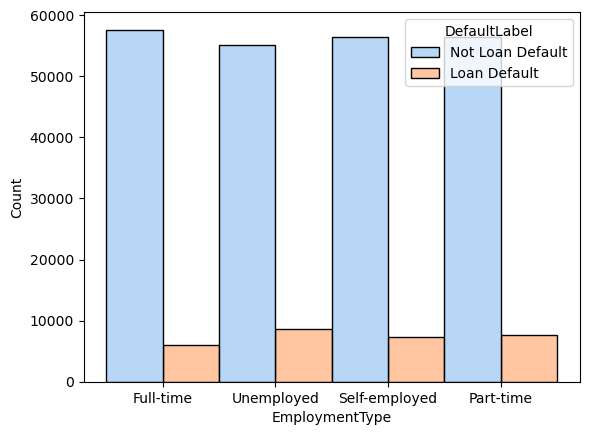

In [385]:
#Plot histplot to examine the employment type of users with and without loan default.
sns.histplot(data=train_df, x='EmploymentType', hue='DefaultLabel', hue_order=['Not Loan Default', 'Loan Default'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**LoanDefaultRiskEmploymentType** (dropped)

Because the loan default among unemployed users is highest, following with the part-time and self-employed users, and smallest among full-time employed users, I'll create new feature 'LoanDefaultRiskEmploymentType' with encoding the original 'EmploymentType' feature with three values: 0 - low risk of loan default, 1 - medium risk of loan default, and 2 - high risk of loan default.

In [388]:
# Create a new feature 'LoanDefaultRiskEmploymentType' based on conditions
#def categorize_employment(x):
#    if x in ['Full-time']:
#        return 0
#    elif x in ['Part-time', 'Self-employed']:
#        return 1
#    else:
#        return 2

#train_df['LoanDefaultRiskEmploymentType'] = train_df['EmploymentType'].apply(categorize_employment)
#test_df['LoanDefaultRiskEmploymentType'] = test_df['EmploymentType'].apply(categorize_employment)


In [389]:
# Check the loan default of the new feature 'LoanDefaultChurnRiskEmploymentType'
#print(train_df.groupby('LoanDefaultRiskEmploymentType', observed=False)['Default'].value_counts(normalize=True))

In [390]:
# Check how this feature is correlated with loan default
#correlation = np.corrcoef(train_df['LoanDefaultRiskEmploymentType'], train_df['Default'])[0, 1]
#print(f"Correlation with loan default: {correlation}")

In [391]:
# New row as a list or Series
#new_row = ['LoanDefaultChurnRiskEmploymentType', correlation]

# Add the row to the end
#corr_loan_default.loc[len(corr_loan_default)] = new_row

#corr_loan_default

In [392]:
#One-hot encoding of 'EmploymentType'

#train_df = pd.get_dummies(train_df, columns=['EmploymentType'])
#test_df = pd.get_dummies(test_df, columns=['EmploymentType'])

#print(train_df.info())
#test_df.info()

**MaritalStatus**

First, let's check the loan default distribution among users with different marital statuses.

In [395]:
train_df.groupby('MaritalStatus')['Default'].value_counts(normalize=True)

MaritalStatus  Default
Divorced       0          0.874672
               1          0.125328
Married        0          0.896028
               1          0.103972
Single         0          0.880876
               1          0.119124
Name: proportion, dtype: float64

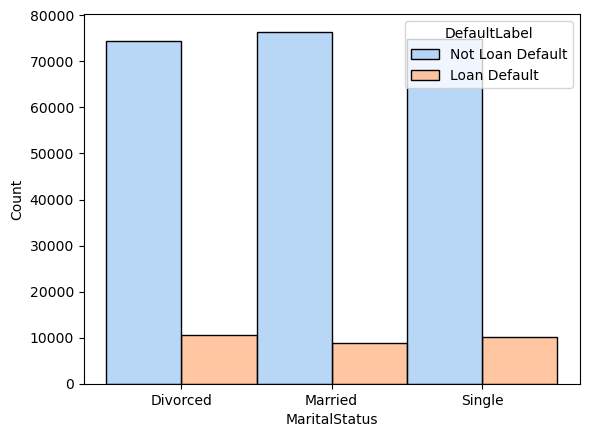

In [396]:
#Plot histplot to examine the marital status of users with loan default and not.
sns.histplot(data=train_df, x='MaritalStatus', hue='DefaultLabel', hue_order=['Not Loan Default', 'Loan Default'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**LoanDefaultRiskMaritalStatus** (dropped)

Because the loan default among divorced and single users is slightly higher that among married users, I'll create new feature 'LoanDefaultRiskMaritalStatus' with binary encoding the original 'MaritalStatus' feature with only two values: 0 - lower risk of loan default, and 1 - higher risk of loan default.

In [399]:
# Create a new binary feature 'LoanDefaultMaritalStatus' based on conditions
#train_df['LoanDefaultRiskMaritalStatus'] = train_df['MaritalStatus'].apply(lambda x: 0 if x in ['Married'] else 1)
#test_df['LoanDefaultRiskMaritalStatus'] = test_df['MaritalStatus'].apply(lambda x: 0 if x in ['Married'] else 1)

In [400]:
# Check the loan default of the new feature 'LoanDefaultMaritalStatus'
#print(train_df.groupby('LoanDefaultRiskMaritalStatus', observed=False)['Default'].value_counts(normalize=True))

In [401]:
# Check how this feature is correlated with loan default
#correlation = np.corrcoef(train_df['LoanDefaultRiskMaritalStatus'], train_df['Default'])[0, 1]
#print(f"Correlation with loan default: {correlation}")

In [402]:
# New row as a list or Series
#new_row = ['LoanDefaultRiskMaritalStatus', correlation]

# Add the row to the end
#corr_loan_default.loc[len(corr_loan_default)] = new_row

#corr_loan_default

In [403]:
#One-hot encoding of 'MaritalStatus'
#train_df = pd.get_dummies(train_df, columns=['MaritalStatus'])
#test_df =  pd.get_dummies(test_df, columns=['MaritalStatus'])

**HasMortgage**

First, let's check the loan default distribution among users with or without mortgage.

In [406]:
train_df.groupby('HasMortgage')['Default'].value_counts(normalize=True)

HasMortgage  Default
No           0          0.876549
             1          0.123451
Yes          0          0.891194
             1          0.108806
Name: proportion, dtype: float64

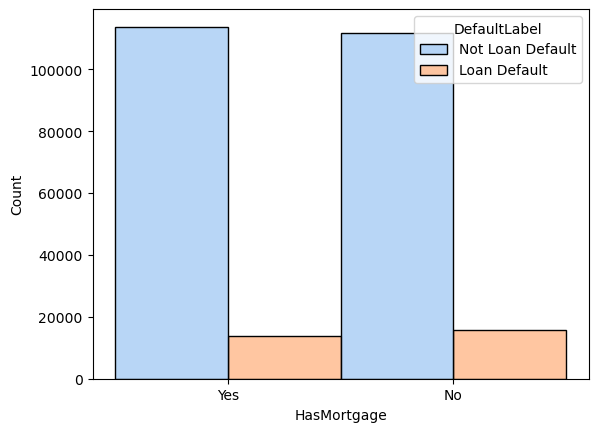

In [407]:
#Plot histplot to examine the loan default among user with and without mortgage.
sns.histplot(data=train_df, x='HasMortgage', hue='DefaultLabel', hue_order=['Not Loan Default', 'Loan Default'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**LoanDefaultRiskHasMortgage** (dropped)

Because the loan default among users without mortgage is slightly higher than among users with mortgage, I'll create new feature 'LoanDefaultRiskHasMortgage' with binary encoding the original 'HasMortgage' feature with only two values: 0 - lower risk of loan default, and 1 - higher risk of loan default.

In [410]:
# Create a new binary feature 'LoanDefaultRiskHasMortgage' based on conditions
#train_df['LoanDefaultRiskHasMortgage'] = train_df['HasMortgage'].apply(lambda x: 0 if x in ['Yes'] else 1)
#test_df['LoanDefaultRiskHasMortgage'] = test_df['HasMortgage'].apply(lambda x: 0 if x in ['Yes'] else 1)

In [411]:
# Check the loan default of the new feature 'LoanDefaultRiskHasMortgage'
#print(train_df.groupby('LoanDefaultRiskHasMortgage', observed=False)['Default'].value_counts(normalize=True))

In [412]:
# Check how this feature is correlated with loan default
#correlation = np.corrcoef(train_df['LoanDefaultRiskHasMortgage'], train_df['Default'])[0, 1]
#print(f"Correlation with loan default: {correlation}")

In [413]:
# New row as a list or Series
#new_row = ['LoanDefaultRiskHasMortgage', correlation]

# Add the row to the end
#corr_loan_default.loc[len(corr_loan_default)] = new_row

#corr_loan_default

In [414]:
#One-hot encoding of 'HasMortgage'
#train_df = pd.get_dummies(train_df, columns=['HasMortgage'])
#test_df =  pd.get_dummies(test_df, columns=['HasMortgage'])

**HasDependents**

First, let's check the loan default distribution among users with or without dependents.

In [417]:
train_df.groupby('HasDependents')['Default'].value_counts(normalize=True)

HasDependents  Default
No             0          0.872756
               1          0.127244
Yes            0          0.894976
               1          0.105024
Name: proportion, dtype: float64

There is only 0.02 difference between loan default among users with with or without dependents.

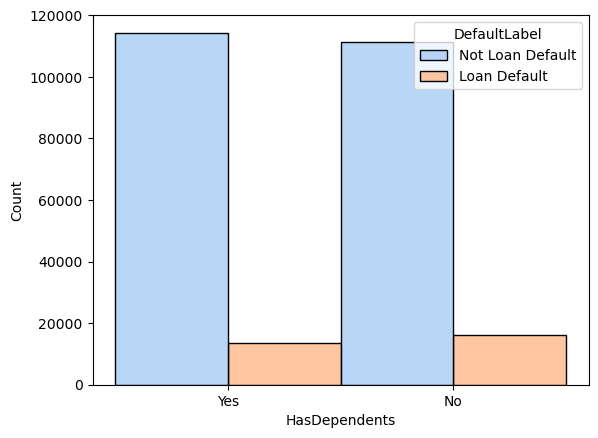

In [419]:
#Plot histplot to examine the marital status of users with loan default and not.
sns.histplot(data=train_df, x='HasDependents', hue='DefaultLabel', hue_order=['Not Loan Default', 'Loan Default'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**LoanDefaultRiskHasDependents** (dropped)

Because the loan default among users without dependents is slightly higher than among users with dependents, I'll create new feature 'LoanDefaultRiskHasDependents' with binary encoding the original 'HasDependents' feature with only two values: 0 - lower risk of loan default, and 1 - higher risk of loan default.

In [422]:
# Create a new binary feature 'LoanDefaultRiskHasDependents' based on conditions
#train_df['LoanDefaultRiskHasDependents'] = train_df['HasDependents'].apply(lambda x: 0 if x in ['Yes'] else 1)
#test_df['LoanDefaultRiskHasDependents'] = test_df['HasDependents'].apply(lambda x: 0 if x in ['Yes'] else 1)

In [423]:
# Check the loan default of the new feature 'LoanDefaultRiskHasMortgage'
#print(train_df.groupby('LoanDefaultRiskHasDependents', observed=False)['Default'].value_counts(normalize=True))

In [424]:
# Check how this feature is correlated with loan default
#correlation = np.corrcoef(train_df['LoanDefaultRiskHasDependents'], train_df['Default'])[0, 1]
#print(f"Correlation with loan default: {correlation}")

In [425]:
# New row as a list or Series
#new_row = ['LoanDefaultRiskHasDependents', correlation]

# Add the row to the end
#corr_loan_default.loc[len(corr_loan_default)] = new_row

#corr_loan_default

In [426]:
#One-hot encoding of 'HasDependents'
#train_df = pd.get_dummies(train_df, columns=['HasDependents'])
#test_df =  pd.get_dummies(test_df, columns=['HasDependents'])

**LoanPurpose**

First, let's check the loan default distribution among users with different loan purposes.

In [429]:
train_df.groupby('LoanPurpose')['Default'].value_counts(normalize=True)

LoanPurpose  Default
Auto         0          0.881186
             1          0.118814
Business     0          0.876740
             1          0.123260
Education    0          0.881619
             1          0.118381
Home         0          0.897652
             1          0.102348
Other        0          0.882115
             1          0.117885
Name: proportion, dtype: float64

There is very small difference between loan default among users with different loan purposes.

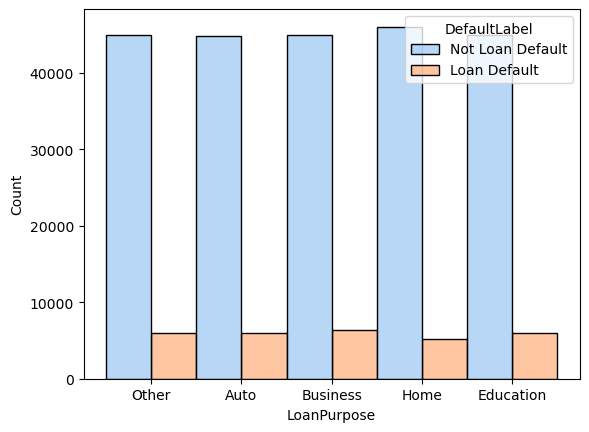

In [431]:
#Plot histplot to examine the loan purpose of users with loan default and not.
sns.histplot(data=train_df, x='LoanPurpose', hue='DefaultLabel', hue_order=['Not Loan Default', 'Loan Default'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

**HasCoSigner**

First, let's check the loan default distribution among users with and without cosigner.

In [434]:
train_df.groupby('HasCoSigner')['Default'].value_counts(normalize=True)

HasCoSigner  Default
No           0          0.871339
             1          0.128661
Yes          0          0.896399
             1          0.103601
Name: proportion, dtype: float64

There is very small difference between loan default among users with and without cosigner.

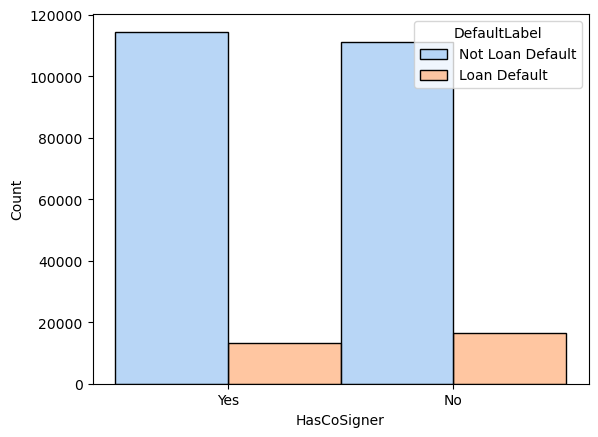

In [436]:
#Plot histplot to examine the loan default among user with and without cosigner.
sns.histplot(data=train_df, x='HasCoSigner', hue='DefaultLabel', hue_order=['Not Loan Default', 'Loan Default'], legend=True, multiple = 'dodge', palette='pastel')
plt.show()

In [437]:
train_df = train_df.drop(columns=['DefaultLabel'])

In [438]:
# Identify object columns
# Convert object columns to StringDtype
#train_df = train_df.drop(columns=['LoanID']).convert_dtypes()
#test_df = test_df.drop(columns=['LoanID']).convert_dtypes()

#categorical_cols_train = train_df.drop(columns=['LoanID']).select_dtypes(include=['object']).columns
#categorical_cols_test = test_df.drop(columns=['LoanID']).select_dtypes(include=['object']).columns

#print(categorical_cols_train)
# Convert categorical columns to string
#train_df[categorical_cols_train] = train_df[categorical_cols_train].astype('category')
#test_df[categorical_cols_test] = test_df[categorical_cols_test].astype('category')

#print(train_df.dtypes)
#print()
#print(test_df.dtypes)

# **Correlation among features** #

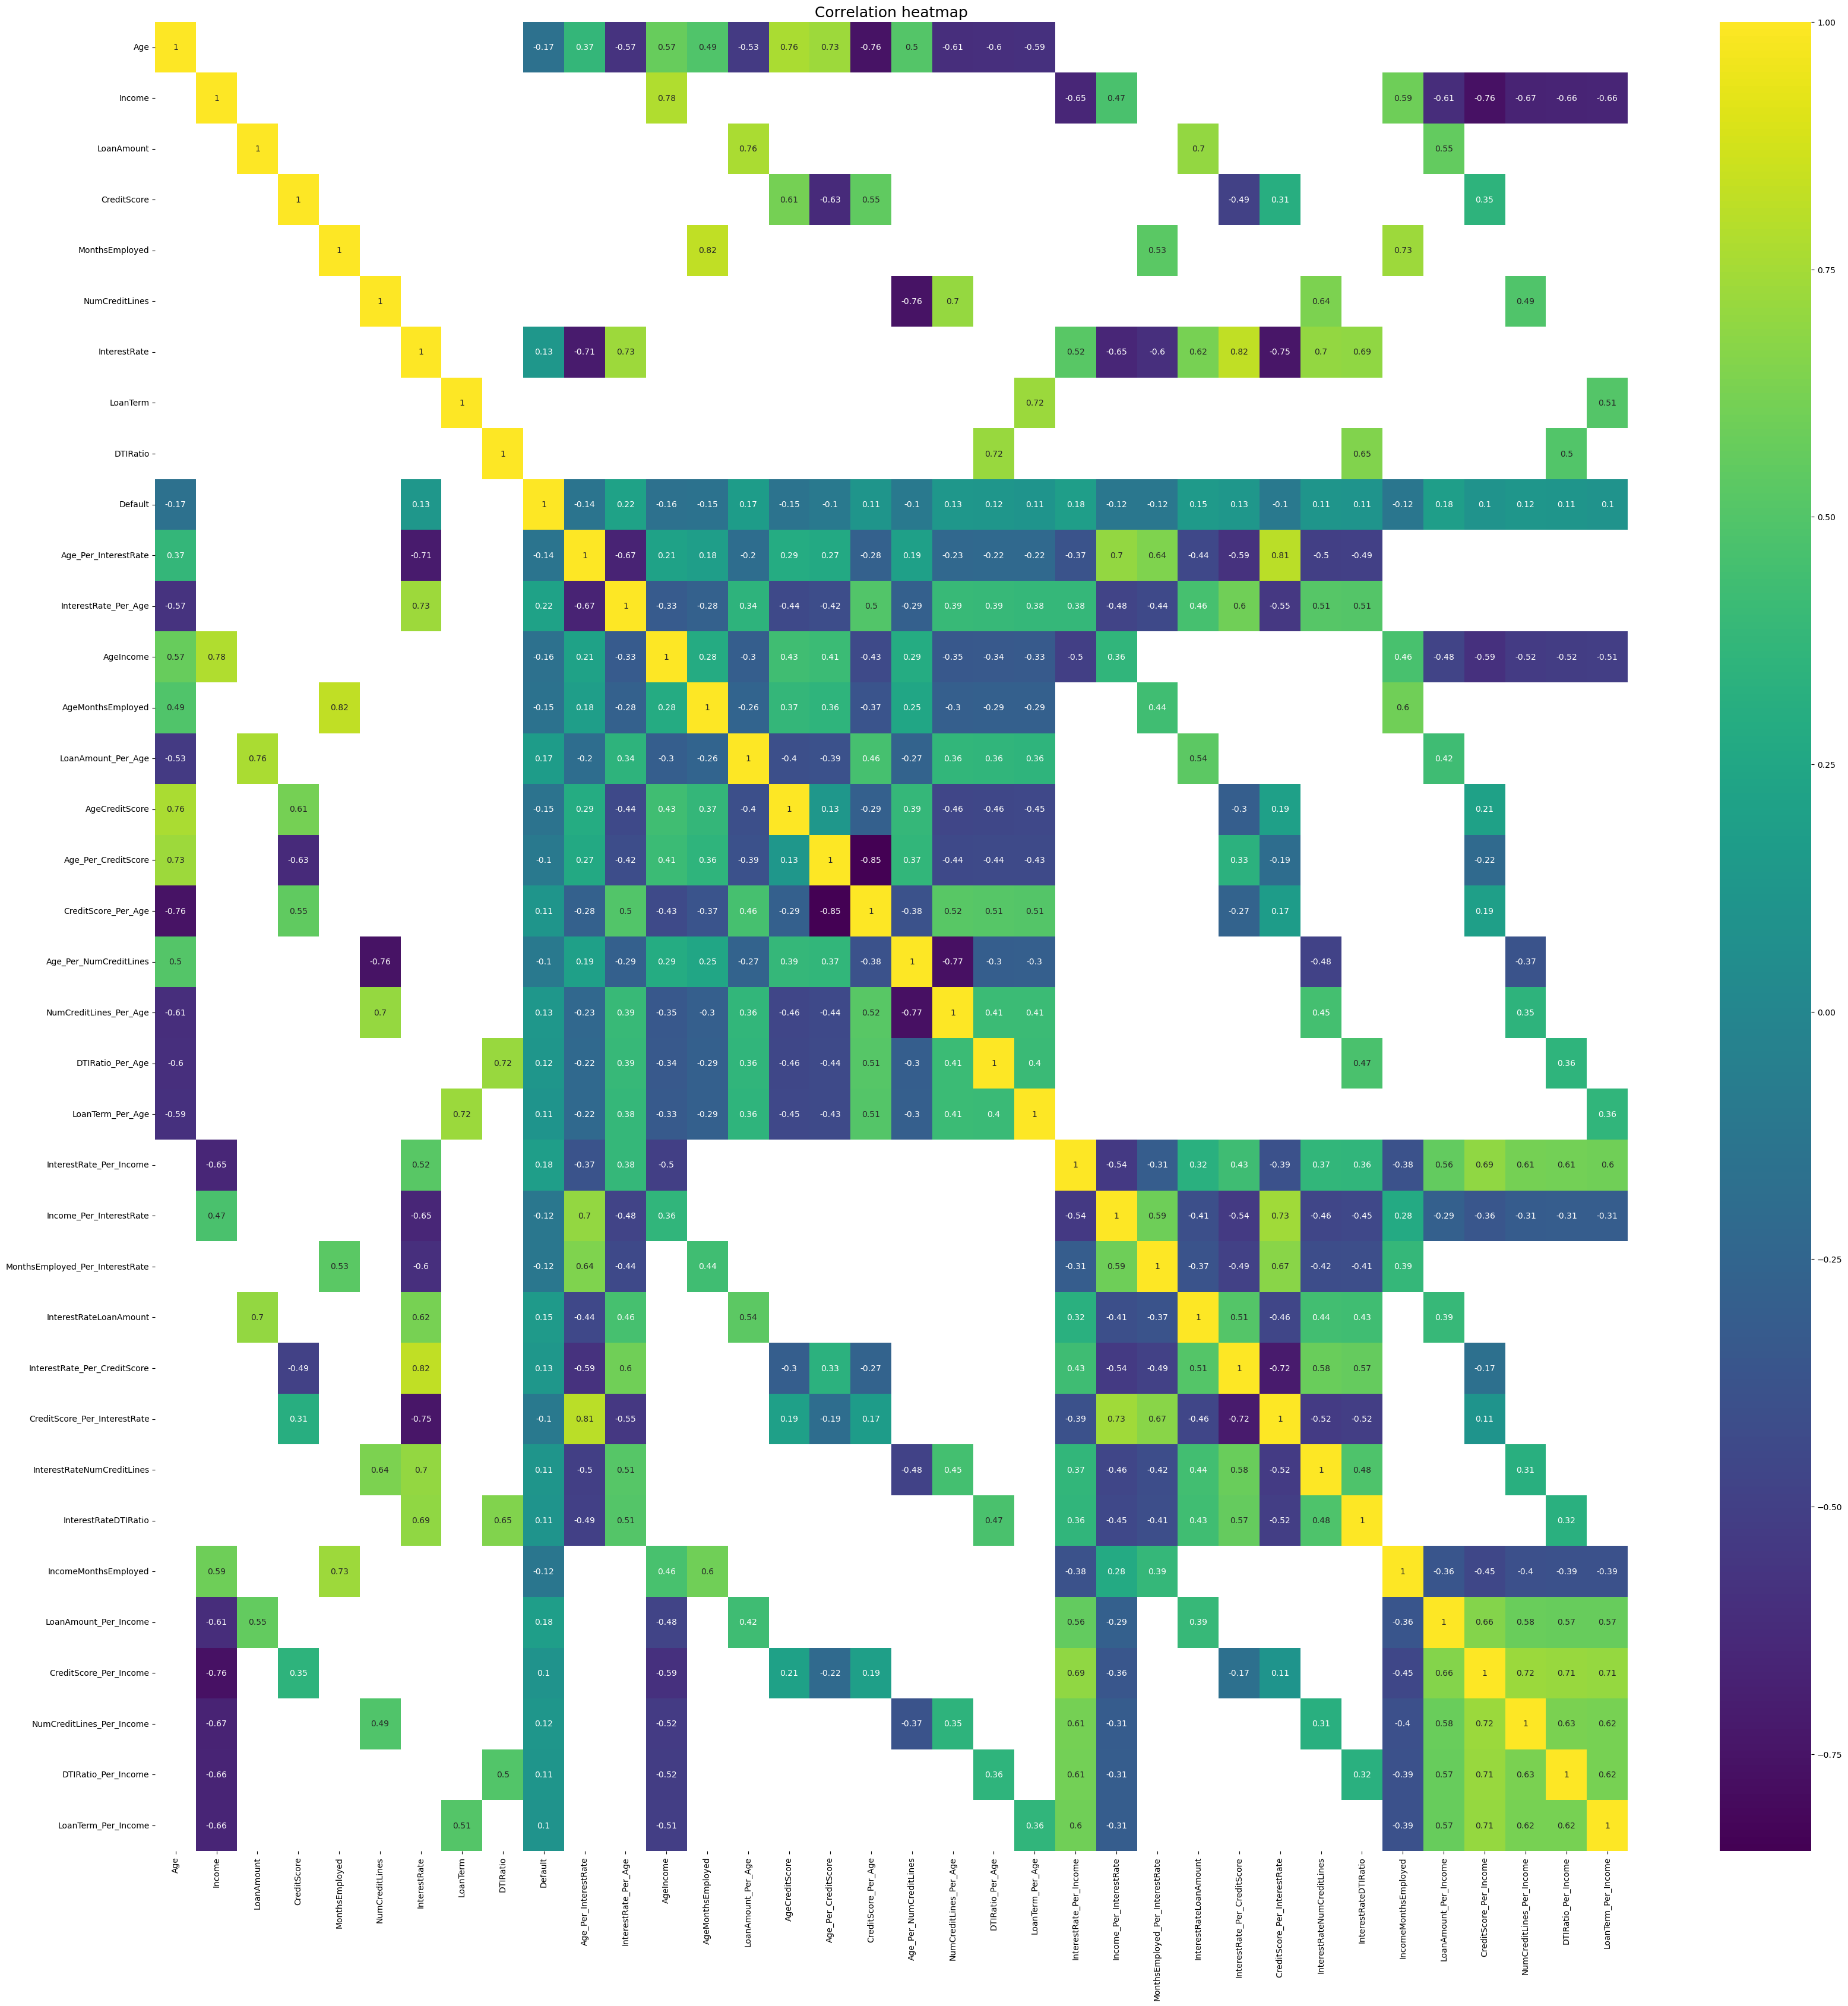

In [440]:
# Show the correlations between potential features
corr_matrix = train_df.corr(method='pearson', numeric_only=True)
filtered_corr_matrix = corr_matrix[abs(corr_matrix) >= 0.1]

plt.figure(figsize=(40,40))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation heatmap', fontsize=18)
plt.show();

In [441]:
# Extract the features correlated to loan default
threshold = 0.0

corr_pairs = corr_matrix.stack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Filter the pairs based on the threshold
loan_default_pairs = corr_pairs[
    (corr_pairs['Feature 2'] == 'Default') &
    (corr_pairs['Feature 1'] != corr_pairs['Feature 2']) &
    (abs(corr_pairs['Correlation']) >= threshold)
]

loan_default_pairs = loan_default_pairs.sort_values(by='Correlation', key=abs, ascending=False)

print(loan_default_pairs)

                            Feature 1 Feature 2  Correlation
405              InterestRate_Per_Age   Default     0.215209
801           InterestRate_Per_Income   Default     0.179283
1125            LoanAmount_Per_Income   Default     0.178963
513                LoanAmount_Per_Age   Default     0.168949
9                                 Age   Default    -0.167783
441                         AgeIncome   Default    -0.163926
477                 AgeMonthsEmployed   Default    -0.151118
909            InterestRateLoanAmount   Default     0.150401
549                    AgeCreditScore   Default    -0.145883
369              Age_Per_InterestRate   Default    -0.136654
225                      InterestRate   Default     0.131273
693            NumCreditLines_Per_Age   Default     0.130530
945      InterestRate_Per_CreditScore   Default     0.127566
1089             IncomeMonthsEmployed   Default    -0.123865
729                  DTIRatio_Per_Age   Default     0.121774
1197        NumCreditLin

In [442]:
# Export the entire table in CSV file
loan_default_pairs.to_csv('loan_default_correlations.csv', index=False)
print("Table exported to 'loan_default_correlations.csv'")

Table exported to 'loan_default_correlations.csv'


# **Scaling** #

**Select numerical features for scaling**

In [445]:
# Select only numerical features in 'train_df' for scaling
numerical_features_train = train_df.select_dtypes(include=['float64', 'int64']).columns
numerical_features_train = numerical_features_train.drop('Default')

print('Check for infinities in training set:', np.isinf(train_df[numerical_features_train]).any().any())  # Check for infinities
print('Check for NaNs in training set:', np.isnan(train_df[numerical_features_train]).any().any())  # Check for NaNs

train_df[numerical_features_train] = train_df[numerical_features_train].replace([np.inf, -np.inf], np.nan)
train_df[numerical_features_train] = train_df[numerical_features_train].fillna(train_df[numerical_features_train].mean())  # Replace inf with NaN

print('Check for infinities in training set after replacing:', np.isinf(train_df[numerical_features_train]).any().any())  # Check for infinities
print('Check for NaNs in training set after replacing:', np.isnan(train_df[numerical_features_train]).any().any())  # Check for NaNs

numerical_features_test = test_df.select_dtypes(include=['float64', 'int64']).columns

print('Check for infinities in test set:', np.isinf(test_df[numerical_features_test]).any().any())  # Check for infinities
print('Check for NaNs in test set:', np.isnan(test_df[numerical_features_test]).any().any())  # Check for NaNs

test_df[numerical_features_test] = test_df[numerical_features_test].replace([np.inf, -np.inf], np.nan)
test_df[numerical_features_test] = test_df[numerical_features_test].fillna(test_df[numerical_features_test].mean())  # Replace inf with NaN

print('Check for infinities in testing set ater replacing:', np.isinf(test_df[numerical_features_test]).any().any())  # Check for infinities
print('Check for NaNs in testing set ater replacing:', np.isnan(test_df[numerical_features_test]).any().any())  # Check for NaNs

Check for infinities in training set: False
Check for NaNs in training set: False
Check for infinities in training set after replacing: False
Check for NaNs in training set after replacing: False
Check for infinities in test set: False
Check for NaNs in test set: False
Check for infinities in testing set ater replacing: False
Check for NaNs in testing set ater replacing: False


In [446]:
# Initialize the scaler
scaler = MinMaxScaler()

train_df_scaled = train_df.copy()
test_df_scaled = test_df.copy()

# Apply scaling to numerical features
train_df_scaled[numerical_features_train] = scaler.fit_transform(train_df[numerical_features_train])

# Select only numerical features in 'test_df' for scaling
test_df_scaled[numerical_features_test] = scaler.fit_transform(test_df[numerical_features_test])

X_train = train_df_scaled.copy()
print("X_train:", X_train.shape)

y_train = train_df_scaled['Default']
print("y_train:", y_train.shape)

X_test = test_df_scaled.copy()
print("X_test:", X_test.shape)


X_train: (255347, 44)
y_train: (255347,)
X_test: (109435, 43)


In [447]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109435 entries, 0 to 109434
Data columns (total 43 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   LoanID                           109435 non-null  object 
 1   Age                              109435 non-null  float64
 2   Income                           109435 non-null  float64
 3   LoanAmount                       109435 non-null  float64
 4   CreditScore                      109435 non-null  float64
 5   MonthsEmployed                   109435 non-null  float64
 6   NumCreditLines                   109435 non-null  float64
 7   InterestRate                     109435 non-null  float64
 8   LoanTerm                         109435 non-null  float64
 9   DTIRatio                         109435 non-null  float64
 10  Education                        109435 non-null  object 
 11  EmploymentType                   109435 non-null  object 
 12  Ma

# **Assigning the predictors and the target variable** #

In [449]:
for col in X_train.select_dtypes(include=['object']).columns:
    if col != 'LoanID':
        X_train[col] = X_train[col].astype('category')

for col in X_test.select_dtypes(include=['object']).columns:
    if col != 'LoanID':
        X_test[col] = X_test[col].astype('category')

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 44 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   LoanID                           255347 non-null  object  
 1   Age                              255347 non-null  float64 
 2   Income                           255347 non-null  float64 
 3   LoanAmount                       255347 non-null  float64 
 4   CreditScore                      255347 non-null  float64 
 5   MonthsEmployed                   255347 non-null  float64 
 6   NumCreditLines                   255347 non-null  float64 
 7   InterestRate                     255347 non-null  float64 
 8   LoanTerm                         255347 non-null  float64 
 9   DTIRatio                         255347 non-null  float64 
 10  Education                        255347 non-null  category
 11  EmploymentType                   255347 non-null  ca

In [450]:
# Split the train set into training and validation sets in 57/43 ratio
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.43, random_state=42)

print(X_tr['Default'].value_counts(normalize=True))
print(X_val['Default'].value_counts(normalize=True))

X_tr = X_tr.drop(columns=['LoanID', 'Default'])
X_val = X_val.drop(columns=['LoanID', 'Default'])
X_test = X_test.drop(columns=['LoanID'])

print("X_tr:", X_tr.shape)
print("y_tr:", y_tr.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("X_test:", X_test.shape)
print()

# Calculate scale_pos_weight
scale_pos_weight = len(y_tr[y_tr == 0]) / len(y_tr[y_tr == 1])
print('scale_pos_weight =', scale_pos_weight)

Default
0    0.883873
1    0.116127
Name: proportion, dtype: float64
Default
0    0.883871
1    0.116129
Name: proportion, dtype: float64
X_tr: (145547, 42)
y_tr: (145547,)
X_val: (109800, 42)
y_val: (109800,)
X_test: (109435, 42)

scale_pos_weight = 7.611229440302923


## Make predictions

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

In [452]:
#Variance ratio

# Assuming X is your data matrix
#pca = PCA()
#X_tr_pca = pca.fit_transform(X_tr)
#X_val_pca = pca.fit_transform(X_val)
#X_test_pca = pca.fit_transform(test_df_scaled.drop(columns=['LoanID']))

# Calculate the explained variance ratio
#explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative variance
#cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components where cumulative variance >= 1.0
#tolerance = 1e-10  # Allow for small floating-point errors
#num_components = np.argmax(cumulative_variance >= 1.0 - tolerance) + 1

# Plot the cumulative explained variance ratio
#plt.plot(np.cumsum(explained_variance_ratio))
#plt.xlabel('Number of Components')
#plt.ylabel('Cumulative Explained Variance')
#plt.title('Cumulative Explained Variance Ratio')
#plt.show()

#print(f"Number of components to reach 1.0 cumulative variance: {num_components}")

In [453]:
# Plot the scree plot
#plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
#plt.xlabel('Number of Components')
#plt.ylabel('Explained Variance')

#plt.title('Scree Plot')
#plt.show()

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**DummyClasifier**

In [545]:
dummy_clf = DummyClassifier(strategy="stratified")

# Fit a dummy classifier on the selected feature columns
dummy_clf.fit(X_tr, y_tr)

# Make predictions on the validation data
predicted_probability = dummy_clf.predict_proba(X_val)[:, 1]

# Calculate the ROC AUC Score
roc_auc = roc_auc_score(y_val, predicted_probability)
print(f"ROC AUC Score for Dummy Classifier: {roc_auc:.4f}")


ROC AUC Score for Dummy Classifier: 0.5005


In [547]:
# Save the result of the DummyCLassifier model in a DataFrame for future comparison
dummy_clf_result = pd.DataFrame({'Model': 'DummyClassifier val', 'ROC_AUC Score': roc_auc}, index=[0])
dummy_clf_result

,Model,ROC_AUC Score
0,DummyClassifier val,0.50049


In [549]:
class_weights = {0: 1, 1: 7}  # 0: majority class, 1: minority class

**LightGBM**

In [552]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    metric='auc',
    class_weight=class_weights,
#   is_unbalance=True,
    random_state=42
)

lgbm_params = {
    'learning_rate': [0.005],
    'n_estimators': [1000],
    'max_depth': [5],  # Allow deeper trees
    'num_leaves': [31],  # Increase leaf count for better splits
    'min_child_samples': [50],  # Allow smaller leaf sizes
    'reg_alpha': [0.1],
    'reg_lambda': [0.1],
    'subsample': [0.9],
    'colsample_bytree': [0.9],
    'min_split_gain': [0.0]  # Reduce gain threshold
}

# Set up StratifiedKFold with 15 splits
stratified_kfold = StratifiedKFold(n_splits=15)

lgbm_cv = GridSearchCV(
    estimator=lgbm,
    param_grid=lgbm_params,
    scoring='roc_auc',
    cv=stratified_kfold,
    verbose=1,
    n_jobs=-1
)


In [554]:
import time
start_time = time.time()
lgbm_cv.fit(X_tr, y_tr)
end_time = time.time()
print(f"Total training time: {end_time - start_time} seconds")


Fitting 15 folds for each of 1 candidates, totalling 15 fits
[LightGBM] [Info] Number of positive: 16902, number of negative: 128645
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031697 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7686
[LightGBM] [Info] Number of data points in the train set: 145547, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.479084 -> initscore=-0.083715
[LightGBM] [Info] Start training from score -0.083715
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

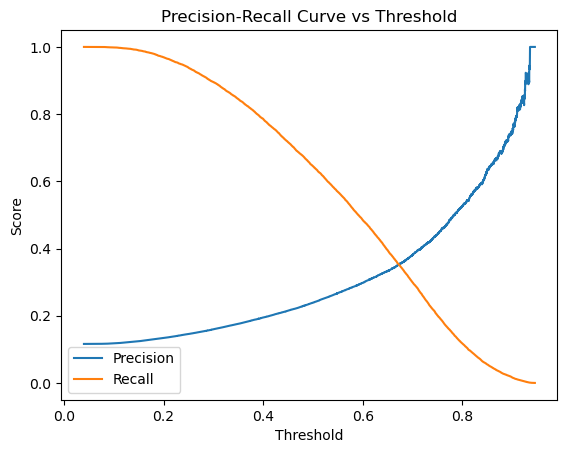

Best threshold: 0.6074556014200282


In [556]:
# Make predictions on the training data
y_pred_tr = lgbm_cv.best_estimator_.predict(X_tr)

# Predict probabilities on the validation set
y_lgbm_pred_proba_val = lgbm_cv.predict_proba(X_val)[:, 1]  # Predicted probabilities

# Get precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_lgbm_pred_proba_val)

f1_scores = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
    else:
        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve vs Threshold")
plt.legend()
plt.show()

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best threshold: {best_threshold}")

In [558]:
# Adjust threshold
y_lgbm_pred_val = (y_lgbm_pred_proba_val >= best_threshold*0.8).astype(int)  # use the previosly calculated best threshold

lgbm_baseline_auc = roc_auc_score(y_val, y_lgbm_pred_proba_val)

#Calculate permutation importance on the validation set for XGBoost
lgbm_permutation_importance = permutation_importance(lgbm_cv.best_estimator_, X_val, y_val, scoring='roc_auc', n_repeats=10, random_state=42)

# Store the results in a DataFrame and sort by importance
# XGBoost Permutation Importances
lgbm_importances_df = pd.DataFrame({'feature': X_val.columns, 'importance_mean': lgbm_permutation_importance.importances_mean}).sort_values(by='importance_mean', ascending=False)

#Display the results in a sorted format
print("\nLightGBM Permutation Importances (Validation Set):")
lgbm_importances_df = lgbm_importances_df.round(6)
print(lgbm_importances_df.head(50))

print()
print()
print(f"Best threshold: {best_threshold}")
print('LightGBM scoring on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))
print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_tr))
print()

#Calculate the scores for the LightGBM model on the validation set
print('LightGBM scoring on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_lgbm_pred_val))
print('Precision Score:', precision_score(y_val, y_lgbm_pred_val))
print('Recall Score:', recall_score(y_val, y_lgbm_pred_val))
print('F1 Score:', f1_score(y_val, y_lgbm_pred_val))

print('ROC AUC Score:', roc_auc_score(y_val, y_lgbm_pred_proba_val))

# Calculate precision, recall, and thresholds for validation set predictions
precision, recall, thresholds = precision_recall_curve(y_val, y_lgbm_pred_proba_val)

# Calculate AUC for the Precision-Recall curve
pr_auc = auc(recall, precision)
pr_auc = pr_auc.round(7)
# Output the AUC-PR score
print(f'AUC-PR Score (validation set): {pr_auc}')


LightGBM Permutation Importances (Validation Set):
                            feature  importance_mean
37            LoanAmount_Per_Income         0.016023
16             Age_Per_InterestRate         0.007448
19                AgeMonthsEmployed         0.006924
17             InterestRate_Per_Age         0.006801
36             IncomeMonthsEmployed         0.006251
10                   EmploymentType         0.004055
20               LoanAmount_Per_Age         0.003881
15                      HasCoSigner         0.003228
21                   AgeCreditScore         0.003103
13                    HasDependents         0.002568
9                         Education         0.001655
18                        AgeIncome         0.001650
30  MonthsEmployed_Per_InterestRate         0.001335
11                    MaritalStatus         0.001088
0                               Age         0.000983
24           Age_Per_NumCreditLines         0.000861
12                      HasMortgage         0.0

In [2838]:
lgbm_cv.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.005,
 'max_depth': 5,
 'min_child_samples': 50,
 'min_split_gain': 0.0,
 'n_estimators': 1000,
 'num_leaves': 31,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'subsample': 0.9}

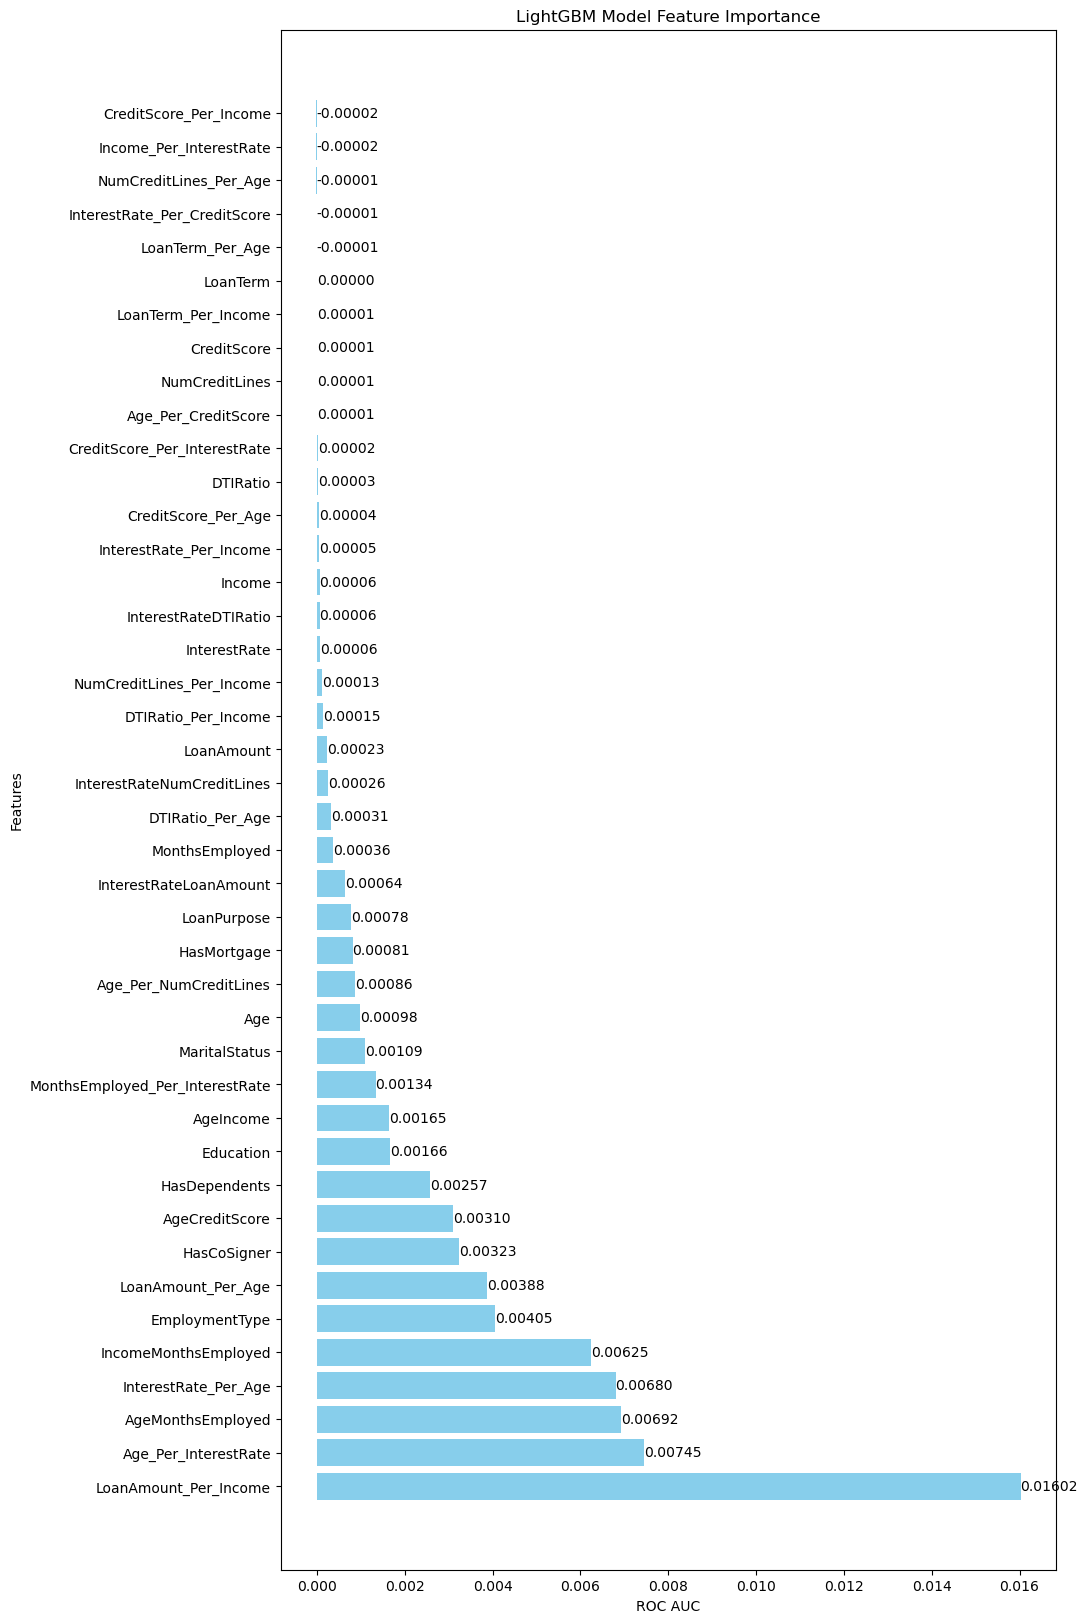

In [2840]:
# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 20))
for index, value in enumerate(lgbm_importances_df['importance_mean']):
    plt.text(value, index, f'{value:.5f}', va='center')  # value is placed at the end of the bar
    
plt.barh(lgbm_importances_df['feature'], lgbm_importances_df['importance_mean'], color='skyblue')

plt.xlabel('ROC AUC')
plt.ylabel('Features')
plt.title('LightGBM Model Feature Importance')
    
plt.show()

In [ ]:
# Calculate feature variances
#selector = VarianceThreshold()
#selector.fit(X_tr)
#variances = selector.variances_

# Create a DataFrame for variances
#variances_df = pd.DataFrame({
#    'feature': X_tr.columns,
#    'variance': variances
#})

#variances_sorted_df = variances_df.sort_values(by='variance', ascending=False)
#variances_sorted_df


In [ ]:
# Merge feature importances with variances
#combined_df = pd.merge(lgbm_importances_df, variances_df, on='feature', how='inner')

# Sort by importance or variance (optional)
#combined_df = combined_df.sort_values(by='importance_mean', ascending=False)


In [2884]:
#from sklearn.feature_selection import VarianceThreshold

# Filter features with low variance and low importance
#low_variance_threshold = 0.01
low_importance_threshold = 0.000001

selected_features = lgbm_importances_df[lgbm_importances_df['importance_mean'] >= low_importance_threshold]['feature'].tolist()

X_tr_selected = X_tr[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

print(X_tr_selected.shape)
print(X_val_selected.shape)
print(X_test_selected.shape)

(145547, 37)
(109800, 37)
(109435, 37)
(145547, 42)


In [ ]:
import time
start_time = time.time()
lgbm_cv.fit(X_tr_selected, y_tr)
end_time = time.time()
print(f"Total training time: {end_time - start_time} seconds")

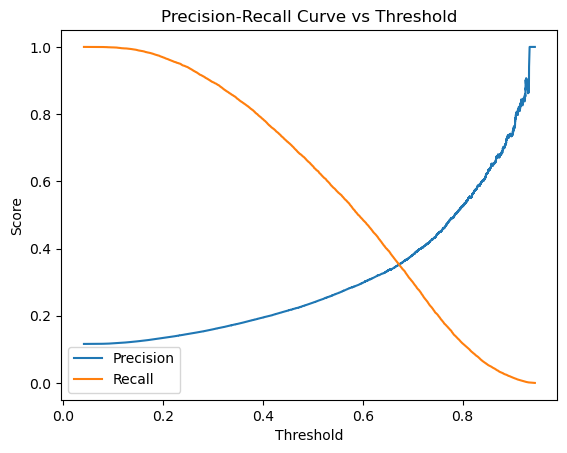

Best threshold: 0.6062955231551063


In [2888]:
# Make predictions on the training data
#y_pred_tr = lgbm_cv.best_estimator_.predict(X_tr_selected)
y_pred_tr = lgbm_cv.best_estimator_.predict(X_tr)

# Predict probabilities on the validation set
#y_lgbm_pred_proba_val = lgbm_cv.predict_proba(X_val_selected)[:, 1]  # Predicted probabilities
y_lgbm_pred_proba_val = lgbm_cv.predict_proba(X_val)[:, 1]  # Predicted probabilities

# Get precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_lgbm_pred_proba_val)

f1_scores = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
    else:
        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve vs Threshold")
plt.legend()
plt.show()

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best threshold: {best_threshold}")

In [2848]:
# Adjust threshold
y_lgbm_pred_val = (y_lgbm_pred_proba_val >= best_threshold*0.8).astype(int)  # use the previosly calculated best threshold

In [2850]:
print(f"Best threshold: {best_threshold}")
print('LightGBM scoring on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))
print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_tr))
print()

#Calculate the scores for the LightGBM model on the validation set
print('LightGBM scoring on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_lgbm_pred_val))
print('Precision Score:', precision_score(y_val, y_lgbm_pred_val))
print('Recall Score:', recall_score(y_val, y_lgbm_pred_val))
print('F1 Score:', f1_score(y_val, y_lgbm_pred_val))

print('ROC AUC Score:', roc_auc_score(y_val, y_lgbm_pred_proba_val))

# Calculate precision, recall, and thresholds for validation set predictions
precision, recall, thresholds = precision_recall_curve(y_val, y_lgbm_pred_proba_val)

# Calculate AUC for the Precision-Recall curve
pr_auc = auc(recall, precision)

# Output the AUC-PR score
print(f'AUC-PR Score (validation set): {pr_auc}')

Best threshold: 0.6062955231551063
LightGBM scoring on the training set:
Accuracy Score: 0.7246868709076794
Precision Score: 0.24661519280824165
Recall Score: 0.6670808188380073
F1 Score: 0.36010284090001754
ROC AUC Score: 0.6996681252260696

LightGBM scoring on the validation set:
Accuracy Score: 0.7036612021857923
Precision Score: 0.2312352286001467
Recall Score: 0.6675554858442475
F1 Score: 0.34348896331867157
ROC AUC Score: 0.7555819072043354
AUC-PR Score (validation set): 0.3263420637613312


In [2852]:
lgbm_cv.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.005,
 'max_depth': 5,
 'min_child_samples': 50,
 'min_split_gain': 0.0,
 'n_estimators': 1000,
 'num_leaves': 31,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'subsample': 0.9}

In [562]:
# Save the result of the LightGBM model in a DataFrame for future comparison
lgbm_cv_result = pd.DataFrame({'Model': 'LightGBM val', 'ROC_AUC Score': roc_auc_score(y_val, y_lgbm_pred_proba_val)}, index=[0])


In [564]:
# Add the result to the results from the other models for comparison
results = pd.concat([dummy_clf_result, lgbm_cv_result])
results

,Model,ROC_AUC Score
0,DummyClassifier val,0.500490
0,LightGBM val,0.755539


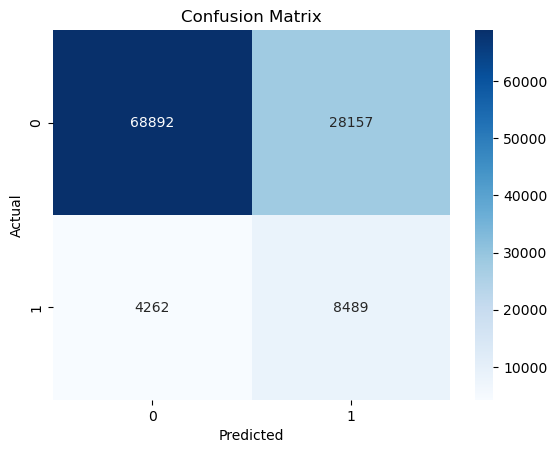

In [566]:
#Plot Confusion Matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_lgbm_pred_val)

# Create a heatmap visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [568]:
# Use LightGBM model to predict on test data

#y_pred = lgbm_cv.predict(X_test_selected)  # For classification
y_pred = lgbm_cv.predict(X_test)  # For classification

#y_pred_proba = lgbm_cv.predict_proba(X_test_selected)[:, 1]  # For probabilities
y_pred_proba = lgbm_cv.predict_proba(X_test)[:, 1]  # For probabilities
print(y_pred_proba)

# Combine predictions with label column into a dataframe
lgbm_prediction_df = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': y_pred_proba})

# Ensure 'prediction_df' contains 109,435 rows and 2 columns 'LoanID' and 'predicted_probaility'
print(lgbm_prediction_df.shape)
print(lgbm_prediction_df.head())

prediction_df = lgbm_prediction_df

[0.31699369 0.18993544 0.21101222 ... 0.2495658  0.22426089 0.93258768]
(109435, 2)
       LoanID  predicted_probability
0  7RYZGMKJIR               0.316994
1  JDL5RH07AM               0.189935
2  STAL716Y79               0.211012
3  SO0KKJ3IQB               0.653947
4  T99CWTYDCP               0.461629


## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [570]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
prediction_df.to_csv("lgbm10_prediction_submission.csv", index=False)
submission = pd.read_csv("lgbm10_prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [572]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [574]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [576]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [2821]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!

**CatBoost**

In [2605]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109800 entries, 151710 to 37284
Data columns (total 42 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   Age                              109800 non-null  float64 
 1   Income                           109800 non-null  float64 
 2   LoanAmount                       109800 non-null  float64 
 3   CreditScore                      109800 non-null  float64 
 4   MonthsEmployed                   109800 non-null  float64 
 5   NumCreditLines                   109800 non-null  float64 
 6   InterestRate                     109800 non-null  float64 
 7   LoanTerm                         109800 non-null  float64 
 8   DTIRatio                         109800 non-null  float64 
 9   Education                        109800 non-null  category
 10  EmploymentType                   109800 non-null  category
 11  MaritalStatus                    109800 non-null  cat

In [2607]:
from catboost import CatBoostClassifier

class_weights = {0: 1, 1: 8}  # 0: majority class, 1: minority class

catboost_params = {
    'iterations': [2000],          # Number of boosting iterations
    'learning_rate': [0.003],       # Learning rate
    'depth': [7],                  # Maximum depth of the tree
    'l2_leaf_reg': [10],            # L2 regularization term on weights
    'bagging_temperature': [0.5],
    'border_count': [64]
}

categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
catboost = CatBoostClassifier(cat_features = categorical_features, loss_function='Logloss', class_weights=class_weights, random_state=42)

# Set up StratifiedKFold with 5 splits
stratified_kfold = StratifiedKFold(n_splits=5)

catboost_cv = GridSearchCV(estimator=catboost, param_grid=catboost_params, scoring='roc_auc', cv=stratified_kfold, verbose=1, n_jobs=-1)


In [2609]:
import time
start_time = time.time()
catboost_cv.fit(X_tr, y_tr)
end_time = time.time()
print(f"Total training time: {end_time - start_time} seconds")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
0:	learn: 0.6926218	total: 243ms	remaining: 8m 4s
1:	learn: 0.6921208	total: 437ms	remaining: 7m 16s
2:	learn: 0.6916269	total: 637ms	remaining: 7m 4s
3:	learn: 0.6911466	total: 822ms	remaining: 6m 50s
4:	learn: 0.6906604	total: 997ms	remaining: 6m 37s
5:	learn: 0.6901918	total: 1.19s	remaining: 6m 33s
6:	learn: 0.6897133	total: 1.37s	remaining: 6m 31s
7:	learn: 0.6892066	total: 1.57s	remaining: 6m 31s
8:	learn: 0.6887135	total: 1.77s	remaining: 6m 31s
9:	learn: 0.6882285	total: 1.97s	remaining: 6m 32s
10:	learn: 0.6877785	total: 2.16s	remaining: 6m 30s
11:	learn: 0.6873021	total: 2.33s	remaining: 6m 25s
12:	learn: 0.6868329	total: 2.5s	remaining: 6m 22s
13:	learn: 0.6863628	total: 2.66s	remaining: 6m 16s
14:	learn: 0.6859137	total: 2.84s	remaining: 6m 15s
15:	learn: 0.6854521	total: 3.01s	remaining: 6m 13s
16:	learn: 0.6849916	total: 3.17s	remaining: 6m 10s
17:	learn: 0.6845581	total: 3.33s	remaining: 6m 7s
18:	learn: 0.684091

In [2611]:
# Display the best parameters and best score
print(f"Best Parameters: {catboost_cv.best_params_}")
print(f"Best ROC AUC Score: {catboost_cv.best_score_:.8f}")

Best Parameters: {'bagging_temperature': 0.5, 'border_count': 64, 'depth': 7, 'iterations': 2000, 'l2_leaf_reg': 10, 'learning_rate': 0.003}
Best ROC AUC Score: 0.74929927


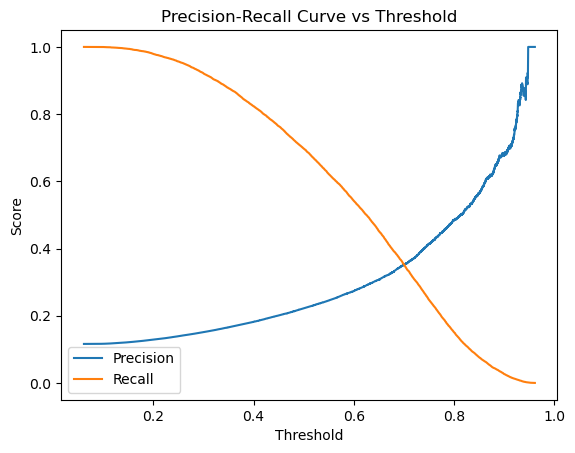

Best threshold: 0.6300207899476571


In [2613]:
# Make predictions on the training data
y_pred_tr = catboost_cv.best_estimator_.predict(X_tr)

# Predict probabilities on the validation set
y_catboost_pred_proba_val = catboost_cv.predict_proba(X_val)[:, 1]  # Predicted probabilities

# Get precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_catboost_pred_proba_val)

f1_scores = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
    else:
        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve vs Threshold")
plt.legend()
plt.show()

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best threshold: {best_threshold}")

In [2615]:
# Adjust threshold
y_catboost_pred_val = (y_catboost_pred_proba_val >= best_threshold*0.8).astype(int)  # use the previosly calculated best threshold

catboost_baseline_auc = roc_auc_score(y_val, y_catboost_pred_proba_val)

#Calculate permutation importance on the validation set for CatBoost
catboost_permutation_importance = permutation_importance(catboost_cv.best_estimator_, X_val, y_val, scoring='roc_auc', n_repeats=10, random_state=42)

# Store the results in a DataFrame and sort by importance
# CatBoost Permutation Importances
catboost_importances_df = pd.DataFrame({'feature': X_val.columns, 'importance_mean': catboost_permutation_importance.importances_mean}).sort_values(by='importance_mean', ascending=False)

#Display the results in a sorted format
print("\nCatBoost Permutation Importances (Validation Set):")
catboost_importances_df = catboost_importances_df.round(6)
print(catboost_importances_df.head(50))

print()
print()
print(f"Best threshold: {best_threshold}")
print('CatBoost scoring on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))
print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_tr))
print()

#Calculate the scores for the CatBoost model on the validation set
print('CatBoost scoring on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_catboost_pred_val))
print('Precision Score:', precision_score(y_val, y_catboost_pred_val))
print('Recall Score:', recall_score(y_val, y_catboost_pred_val))
print('F1 Score:', f1_score(y_val, y_catboost_pred_val))

print('ROC AUC Score:', roc_auc_score(y_val, y_catboost_pred_proba_val))

# Calculate precision, recall, and thresholds for validation set predictions
precision, recall, thresholds = precision_recall_curve(y_val, y_catboost_pred_proba_val)

# Calculate AUC for the Precision-Recall curve
pr_auc = auc(recall, precision)
pr_auc = pr_auc.round(7)
# Output the AUC-PR score
print(f'AUC-PR Score (validation set): {pr_auc}')


CatBoost Permutation Importances (Validation Set):
                            feature  importance_mean
37            LoanAmount_Per_Income         0.011680
19                AgeMonthsEmployed         0.005706
16             Age_Per_InterestRate         0.005099
17             InterestRate_Per_Age         0.004116
15                      HasCoSigner         0.003435
20               LoanAmount_Per_Age         0.003078
10                   EmploymentType         0.002922
0                               Age         0.002882
36             IncomeMonthsEmployed         0.002715
13                    HasDependents         0.002680
21                   AgeCreditScore         0.002267
30  MonthsEmployed_Per_InterestRate         0.001508
18                        AgeIncome         0.001454
31           InterestRateLoanAmount         0.001210
4                    MonthsEmployed         0.001128
12                      HasMortgage         0.000917
2                        LoanAmount         0.0

In [2617]:
catboost_cv.best_params_

{'bagging_temperature': 0.5,
 'border_count': 64,
 'depth': 7,
 'iterations': 2000,
 'l2_leaf_reg': 10,
 'learning_rate': 0.003}

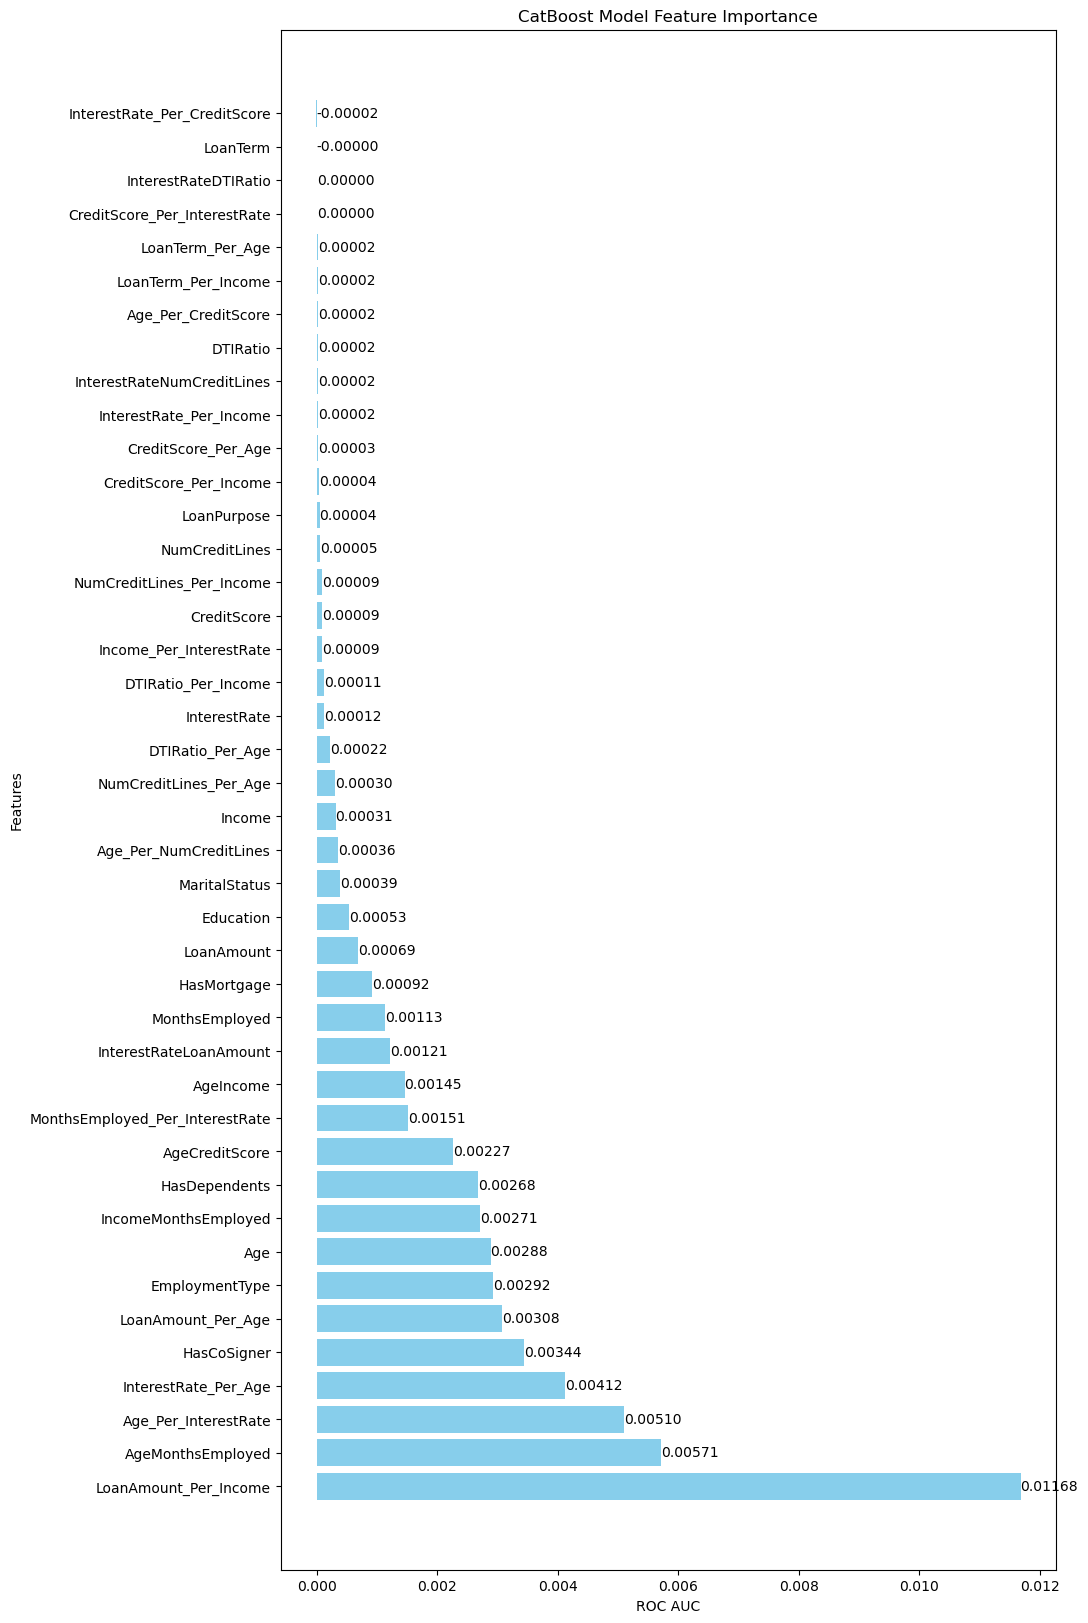

In [2619]:
# Plot the feature importances as a horizontal bar chart
plt.figure(figsize=(10, 20))
for index, value in enumerate(catboost_importances_df['importance_mean']):
    plt.text(value, index, f'{value:.5f}', va='center')  # value is placed at the end of the bar
    
plt.barh(catboost_importances_df['feature'], catboost_importances_df['importance_mean'], color='skyblue')

plt.xlabel('ROC AUC')
plt.ylabel('Features')
plt.title('CatBoost Model Feature Importance')
    
plt.show()

In [2621]:
#Set the importance threshold
importance_threshold = 0.0003  # Adjust this threshold as needed

# Filter features based on the threshold
selected_features = catboost_importances_df[catboost_importances_df['importance_mean'] >= importance_threshold]['feature'].tolist()

# Using set intersection
cat_features = set(categorical_features).intersection(set(selected_features))

# Convert the set back to a list
cat_features_array = list(cat_features)

# Create new DataFrames with selected features
X_tr_selected = X_tr[selected_features]
X_test_selected = X_test[selected_features]
X_val_selected = X_val[selected_features]

In [2632]:
print(len(selected_features))

22


In [2627]:
print(cat_features_array)

['Education', 'HasMortgage', 'HasCoSigner', 'EmploymentType', 'HasDependents', 'MaritalStatus']


In [2629]:
from catboost import CatBoostClassifier

class_weights = {0: 1, 1: 8}  # 0: majority class, 1: minority class

catboost_params = {
    'iterations': [2000],          # Number of boosting iterations
    'learning_rate': [0.003],       # Learning rate
    'depth': [7],                  # Maximum depth of the tree
    'l2_leaf_reg': [10],            # L2 regularization term on weights
    'bagging_temperature': [0.5],
    'border_count': [64]
}

catboost = CatBoostClassifier(cat_features = cat_features_array, loss_function='Logloss', class_weights=class_weights, random_state=42)

# Set up StratifiedKFold with 5 splits
stratified_kfold = StratifiedKFold(n_splits=5)

catboost_cv = GridSearchCV(estimator=catboost, param_grid=catboost_params, scoring='roc_auc', cv=stratified_kfold, verbose=1, n_jobs=-1)


In [2631]:
import time
start_time = time.time()
catboost_cv.fit(X_tr_selected, y_tr)
end_time = time.time()


Fitting 5 folds for each of 1 candidates, totalling 5 fits
0:	learn: 0.6926758	total: 173ms	remaining: 5m 46s
1:	learn: 0.6921562	total: 351ms	remaining: 5m 50s
2:	learn: 0.6916602	total: 536ms	remaining: 5m 56s
3:	learn: 0.6911632	total: 729ms	remaining: 6m 3s
4:	learn: 0.6906808	total: 916ms	remaining: 6m 5s
5:	learn: 0.6901907	total: 1.08s	remaining: 5m 59s
6:	learn: 0.6896871	total: 1.25s	remaining: 5m 56s
7:	learn: 0.6892175	total: 1.41s	remaining: 5m 51s
8:	learn: 0.6887187	total: 1.6s	remaining: 5m 53s
9:	learn: 0.6882389	total: 1.75s	remaining: 5m 48s
10:	learn: 0.6877560	total: 1.92s	remaining: 5m 47s
11:	learn: 0.6872894	total: 2.07s	remaining: 5m 43s
12:	learn: 0.6868175	total: 2.23s	remaining: 5m 40s
13:	learn: 0.6863387	total: 2.4s	remaining: 5m 41s
14:	learn: 0.6858713	total: 2.59s	remaining: 5m 42s
15:	learn: 0.6853942	total: 2.75s	remaining: 5m 41s
16:	learn: 0.6849330	total: 2.94s	remaining: 5m 42s
17:	learn: 0.6844925	total: 3.11s	remaining: 5m 42s
18:	learn: 0.684049

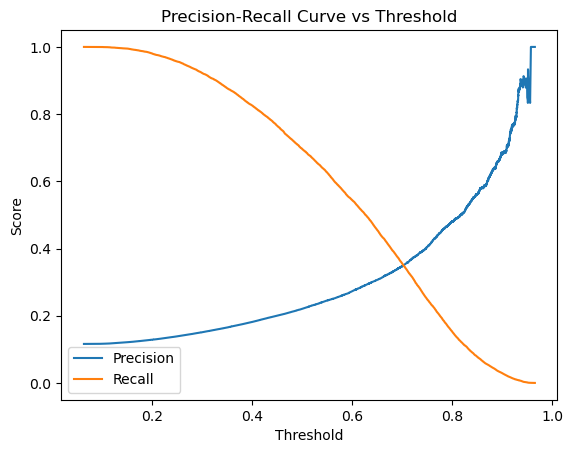

Best threshold: 0.6313634312786995


In [2635]:
# Make predictions on the training data
y_pred_tr = catboost_cv.best_estimator_.predict(X_tr_selected)

# Predict probabilities on the validation set
y_catboost_pred_proba_val = catboost_cv.predict_proba(X_val_selected)[:, 1]  # Predicted probabilities

# Get precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_catboost_pred_proba_val)

f1_scores = np.zeros_like(thresholds)
for i in range(len(thresholds)):
    if precisions[i] + recalls[i] > 0:  # Check if precision + recall is greater than 0
        f1_scores[i] = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
    else:
        f1_scores[i] = 0  # Set to 0 if both precision and recall are 0

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curve vs Threshold")
plt.legend()
plt.show()

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best threshold: {best_threshold}")

In [2637]:
# Adjust threshold
y_catboost_pred_val = (y_catboost_pred_proba_val >= best_threshold*0.8).astype(int)  # use the previosly calculated best threshold

catboost_baseline_auc = roc_auc_score(y_val, y_catboost_pred_proba_val)

#Calculate permutation importance on the validation set for CatBoost
catboost_permutation_importance = permutation_importance(catboost_cv.best_estimator_, X_val_selected, y_val, scoring='roc_auc', n_repeats=10, random_state=42)

# Store the results in a DataFrame and sort by importance
# CatBoost Permutation Importances
catboost_importances_df = pd.DataFrame({'feature': X_val_selected.columns, 'importance_mean': catboost_permutation_importance.importances_mean}).sort_values(by='importance_mean', ascending=False)

#Display the results in a sorted format
print("\nCatBoost Permutation Importances (Validation Set):")
catboost_importances_df = catboost_importances_df.round(6)
print(catboost_importances_df.head(50))

print()
print()
print(f"Best threshold: {best_threshold}")
print('CatBoost scoring on the training set:')
print('Accuracy Score:', accuracy_score(y_tr, y_pred_tr))
print('Precision Score:', precision_score(y_tr, y_pred_tr))
print('Recall Score:', recall_score(y_tr, y_pred_tr))
print('F1 Score:', f1_score(y_tr, y_pred_tr))
print('ROC AUC Score:', roc_auc_score(y_tr, y_pred_tr))
print()

#Calculate the scores for the CatBoost model on the validation set
print('CatBoost scoring on the validation set:')
print('Accuracy Score:', accuracy_score(y_val, y_catboost_pred_val))
print('Precision Score:', precision_score(y_val, y_catboost_pred_val))
print('Recall Score:', recall_score(y_val, y_catboost_pred_val))
print('F1 Score:', f1_score(y_val, y_catboost_pred_val))

print('ROC AUC Score:', roc_auc_score(y_val, y_catboost_pred_proba_val))

# Calculate precision, recall, and thresholds for validation set predictions
precision, recall, thresholds = precision_recall_curve(y_val, y_catboost_pred_proba_val)

# Calculate AUC for the Precision-Recall curve
pr_auc = auc(recall, precision)
pr_auc = pr_auc.round(7)
# Output the AUC-PR score
print(f'AUC-PR Score (validation set): {pr_auc}')


CatBoost Permutation Importances (Validation Set):
                            feature  importance_mean
0             LoanAmount_Per_Income         0.014202
2              Age_Per_InterestRate         0.008071
3              InterestRate_Per_Age         0.007993
10                   AgeCreditScore         0.004971
8              IncomeMonthsEmployed         0.003757
11  MonthsEmployed_Per_InterestRate         0.003669
4                       HasCoSigner         0.003601
1                 AgeMonthsEmployed         0.003223
6                    EmploymentType         0.003151
9                     HasDependents         0.002758
13           InterestRateLoanAmount         0.002205
5                LoanAmount_Per_Age         0.001768
12                        AgeIncome         0.001726
7                               Age         0.001359
15                      HasMortgage         0.000998
20                           Income         0.000833
14                   MonthsEmployed         0.0

In [2639]:
# Save the result of the CatBoost model in a DataFrame for future comparison
catboost_cv_result = pd.DataFrame({'Model': 'CatBoost val', 'ROC_AUC Score': roc_auc_score(y_val, y_catboost_pred_proba_val)}, index=[0])


In [2641]:
# Add the result to the results from the other models for comparison
results = pd.concat([dummy_clf_result, lgbm_cv_result, catboost_cv_result])
results

,Model,ROC_AUC Score
0,DummyClassifier val,0.502501
0,LightGBM val,0.755831
0,CatBoost val,0.754435


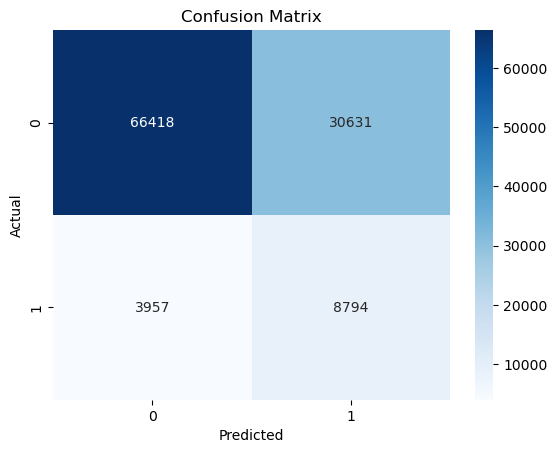

In [2643]:
#Plot Confusion Matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_catboost_pred_val)

# Create a heatmap visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [2645]:
# Use CatBoost model to predict on test data

y_pred = catboost_cv.predict(X_test_selected)  # For classification

y_pred_proba = catboost_cv.predict_proba(X_test_selected)[:, 1]  # For probabilities

print(y_pred_proba)

# Combine predictions with label column into a dataframe
catboost_prediction_df = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': y_pred_proba})

# Ensure 'prediction_df' contains 109,435 rows and 2 columns 'LoanID' and 'predicted_probaility'
print(catboost_prediction_df.shape)
print(catboost_prediction_df.head())

prediction_df = catboost_prediction_df

[0.37785086 0.18030004 0.23488796 ... 0.25334817 0.27490755 0.95564505]
(109435, 2)
       LoanID  predicted_probability
0  7RYZGMKJIR               0.377851
1  JDL5RH07AM               0.180300
2  STAL716Y79               0.234888
3  SO0KKJ3IQB               0.594761
4  T99CWTYDCP               0.479276


In [2647]:
# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 109,435 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
print(prediction_df.head(10))

(109435, 2)
       LoanID  predicted_probability
0  7RYZGMKJIR               0.377851
1  JDL5RH07AM               0.180300
2  STAL716Y79               0.234888
3  SO0KKJ3IQB               0.594761
4  T99CWTYDCP               0.479276
5  0SNHFWV4UP               0.387334
6  S6ITP6LGYS               0.196397
7  A6I7U12IRJ               0.305447
8  8W6KY50JU4               0.404198
9  THFQ08OLMU               0.446435


In [2649]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
prediction_df.to_csv("catboost4_prediction_submission.csv", index=False)
submission = pd.read_csv("catboost4_prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [2650]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be LoanID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [2653]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [2655]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'